In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [201]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [202]:
#menghapus kolom loan
loan = df.drop(columns="Loan_ID",axis=1)

In [203]:
#melihat kolom dan baris pada data set
loan.shape

(614, 12)

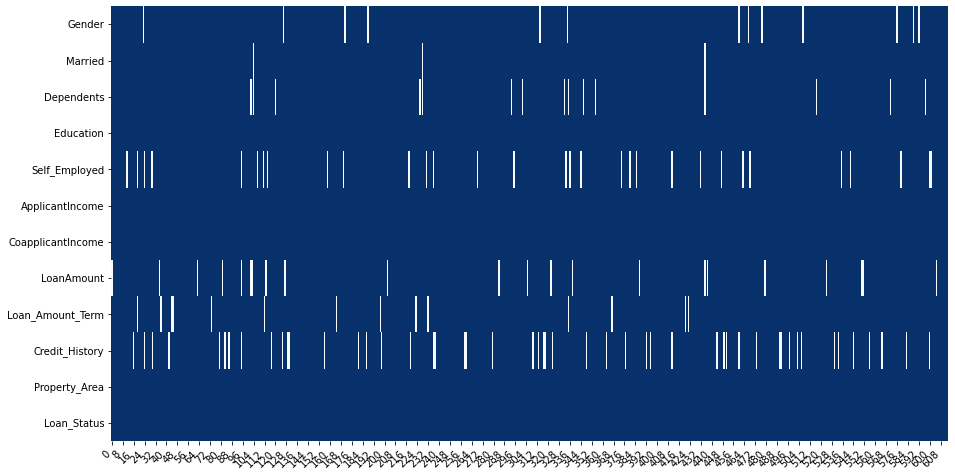

In [204]:
#melihat nilai nan menggunakan plot
from jcopml.plot import plot_missing_value
plot_missing_value(loan)

In [205]:
#menghapus nilai nan
loan.dropna(inplace=True)

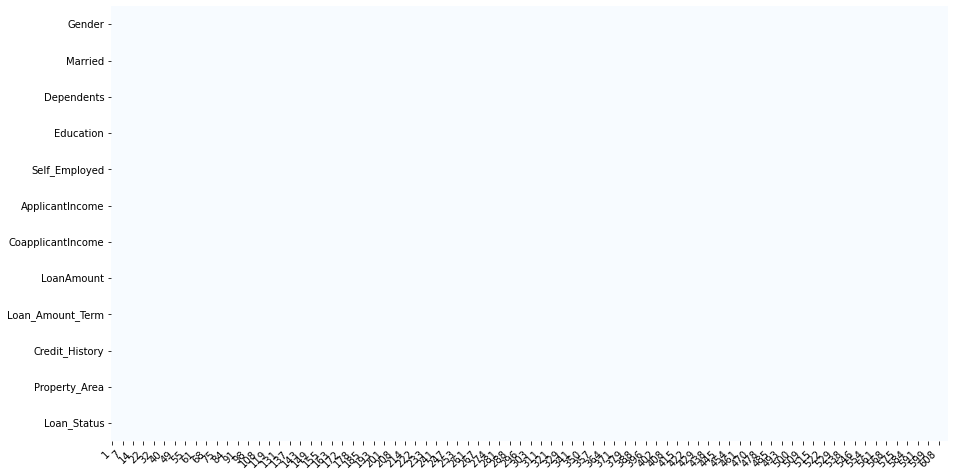

In [206]:
plot_missing_value(loan)

In [207]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,480.0,5364.231250,5668.251251,150.0,2898.75,3859.0,5852.50,81000.0
CoapplicantIncome,480.0,1581.093583,2617.692267,0.0,0.00,1084.5,2253.25,33837.0
LoanAmount,480.0,144.735417,80.508164,9.0,100.00,128.0,170.00,600.0
Loan_Amount_Term,480.0,342.050000,65.212401,36.0,360.00,360.0,360.00,480.0
Credit_History,480.0,0.854167,0.353307,0.0,1.00,1.0,1.00,1.0


In [208]:
#import ibrary
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [209]:
#ubah semua data kategorikal
data=loan

label_encoders = {}
categorical_columns = data.columns  
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [210]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,247,50,76,7,1,0,0
2,1,1,0,0,1,112,0,23,7,1,2,1
3,1,1,0,1,0,74,135,68,7,1,2,1
4,1,0,0,0,0,305,0,89,7,1,2,1
5,1,1,2,0,1,281,196,159,7,1,2,1


<AxesSubplot:xlabel='Education', ylabel='count'>

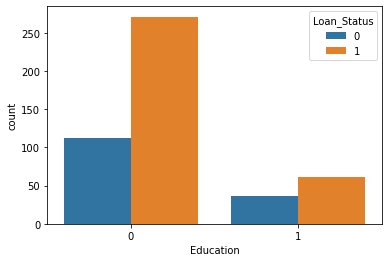

In [211]:
#data visualisasi
sns.countplot(x='Education',hue='Loan_Status',data=data)

- Education   :Angka 0 mempresentasikan graduate dana Angka 1 mempresentasikan not graduate 
- loan_status :Angka 0 mempresentasikan Y dan Angka 1 mempresentasikan N

<AxesSubplot:xlabel='Married', ylabel='count'>

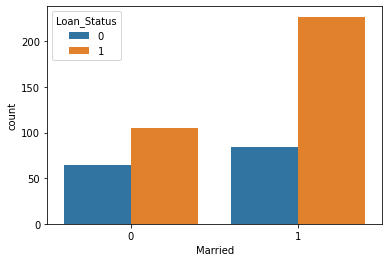

In [212]:
#data visualisasi
sns.countplot(x='Married',hue='Loan_Status',data=data)

- Married : 0 mempresentasikan Yes dan angka 1 mempresentasikan No
- loan_status :Angka 0 mempresentasikan Y dan Angka 1 mempresentasikan N

In [213]:
#Importing librarires - classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [214]:
#memisahkan data x dan y
X = loan.drop(columns='Loan_Status',axis=1)
y = loan['Loan_Status']

In [215]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=Y,random_state=2)

#melihat pembagian data
print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print()
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (336, 11)
X Test  :  (144, 11)

Y Train :  (336,)
Y Test  :  (144,)


In [216]:
#model svc
classi = SVC(kernel='linear')

In [217]:
#training  model support vector machine
classi.fit(X_train,y_train)

SVC(kernel='linear')

In [218]:
#accuracy
predict = classi.predict(X_train)
training = accuracy_score(predict,y_train)

In [219]:
print('accuracy  : ',training)

accuracy  :  0.8005952380952381
